In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import optimize as op
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
df=pd.read_csv(r"D:\iris\data\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


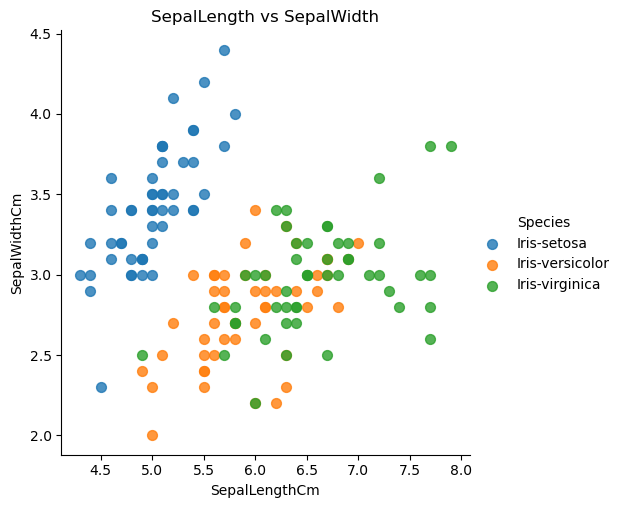

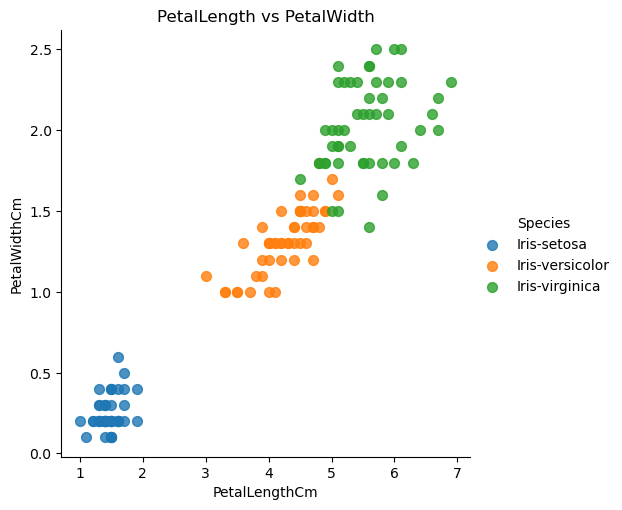

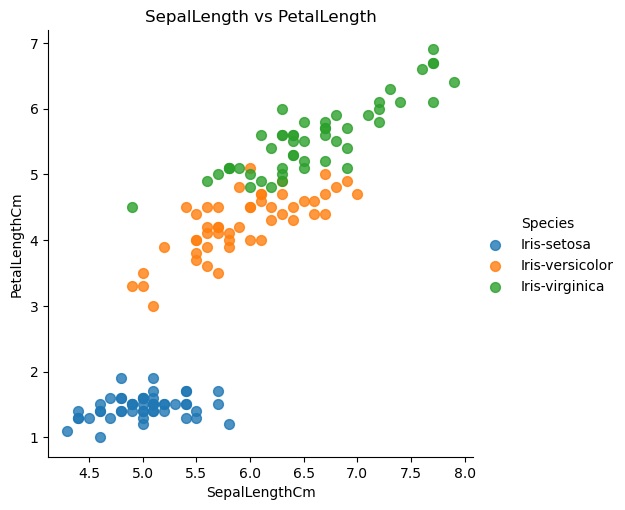

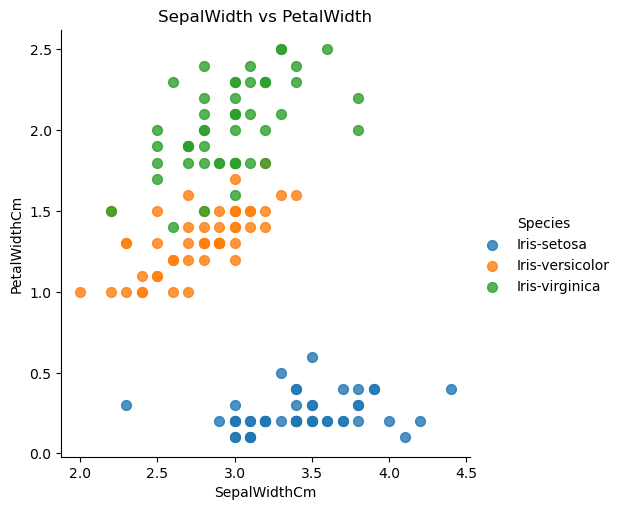

In [147]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()


In [148]:
variety = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Number of examples
m = df.shape[0]
# Features
n = 4
# Number of classes
k = 3

X = np.ones((m,n + 1))
y = np.array((m,1))
X[:,1] = df['PetalLengthCm'].values
X[:,2] = df['PetalWidthCm'].values
X[:,3] = df['SepalLengthCm'].values
X[:,4] = df['SepalWidthCm'].values

# Labels
y = df['Species'].values

for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
X = df.drop(['Species'], axis=1)
y = df['Species']
print(X_train.shape)
print(y_test.shape)

(120, 5)
(30,)


In [150]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [151]:
def reglrCostFunction(theta, X, y, lambda_s = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    reg = (lambda_s/(2 * m)) * np.sum(theta**2)
    J = J + reg

    return J

In [152]:
def reglrGradient(theta, X, y, lambda_s = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = lambda_s * theta /m
    gd = ((1 / m) * X.T.dot(h - y))
    gd = gd + reg

    return gd

In [153]:
def logisticRegression(X, y, theta):
    result = op.minimize(fun = reglrCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = reglrGradient)

    return result.x

In [154]:

all_theta = np.zeros((k, n + 1))
i = 0
for flower in variety:
    tmp_y = np.array(y_train == flower, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [155]:
def accuracy(y_test, pred):
    return (y_test==pred).mean()

Prob = sigmoid(X_test.dot(all_theta.T))
pred = [variety[np.argmax(Prob[i, :])] for i in range(X_test.shape[0])]

print(" Test Accuracy ", accuracy(y_test, pred) * 100 , '%')

 Test Accuracy  96.66666666666667 %


In [156]:
##print the confusion matrix using matplotlib and seaborn

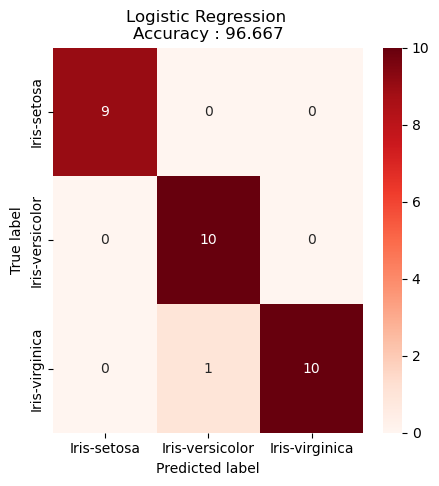

In [157]:
cm = confusion_matrix(y_test, pred)
class_label = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True, cmap='Reds', fmt='g')
plt.title('Logistic Regression \nAccuracy : {0:.3f}'.format(accuracy(y_test, pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
